In [5]:
import pandas_datareader as pdr
import datetime
import pandas as pd

In [6]:
aapl = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2006, 10, 1), end=datetime.datetime(2012, 1, 1))

In [7]:
import quandl

In [8]:
aaplq = quandl.get('WIKI/AAPL', start_date='2006-10-01', end_date='2012-01-01')

In [9]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.287629
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.263793
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.303519
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.286713
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.268071


In [10]:
aaplq.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [11]:
aapl.to_csv('data/algo_test.csv')

In [12]:
df = pd.read_csv('data/algo_test.csv', header=0, index_col='Date', parse_dates=True)

In [13]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.287629
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.263793
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.303519
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.286713
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.268071


In [14]:
sample = aapl.sample(20)
print(sample)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2009-10-05   6.673572   6.581071   6.650000   6.643571   423133200   5.684541
2008-09-29   4.274286   3.592500   4.272143   3.759286  2622057200   3.216615
2009-07-14   5.113572   5.041429   5.072500   5.081071   347247600   4.347596
2011-03-21  12.133572  11.973572  11.999643  12.117857   409402000  10.368587
2010-02-12   7.201428   6.982143   7.075357   7.156428   655468800   6.123366
2011-03-07  12.916785  12.546785  12.907143  12.691428   546123200  10.859360
2011-08-03  14.055357  13.651428  13.963572  14.020357   732508000  11.996453
2009-03-09   3.128572   2.948929   3.006428   2.968214   698297600   2.539739
2010-08-09   9.362500   9.270357   9.338572   9.348214   303128000   7.998756
2010-11-24  11.264286  11.133928  11.142858  11.242857   413725200   9.619898
2008-09-10   5.535357   5.314286   5.440000   5.414643   9731428

In [15]:
monthly_aapl = aapl.resample('M').mean()
print(monthly_aapl)

                 High        Low       Open      Close        Volume  \
Date                                                                   
2006-10-31   2.780942   2.723279   2.750731   2.754497  6.539980e+08   
2006-11-30   3.078656   3.007245   3.040391   3.048027  6.588040e+08   
2006-12-31   3.136625   3.051393   3.103964   3.088268  8.445396e+08   
2007-01-31   3.220214   3.130643   3.180589   3.174339  1.360489e+09   
2007-02-28   3.095733   3.027951   3.063026   3.061711  7.222292e+08   
...               ...        ...        ...        ...           ...   
2011-08-31  13.637500  13.255326  13.473587  13.455807  7.018521e+08   
2011-09-30  14.186480  13.859524  14.013554  14.017619  5.703547e+08   
2011-10-31  14.350595  13.983061  14.169422  14.186786  6.257823e+08   
2011-11-30  13.888554  13.631650  13.795289  13.743401  4.268429e+08   
2011-12-31  14.130884  13.933554  14.027517  14.033231  3.003111e+08   

            Adj Close  
Date                   
2006-10-31   2.

In [16]:
aapl['diff'] = aapl.Open - aapl.Close

In [17]:
del aapl['diff']

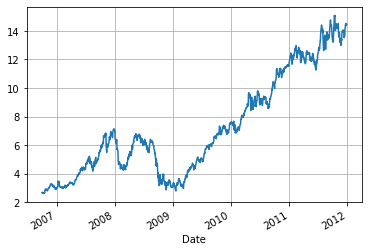

In [18]:
import matplotlib.pyplot as plt

aapl['Close'].plot(grid=True)
plt.show()

In [19]:
daily_close = aapl[['Adj Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011994
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [20]:
import numpy as np

daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007902
2011-12-28  -0.009615
2011-12-29   0.006140
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [21]:
monthly = aapl.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()
quarter = aapl.resample('4M').mean()
quarter.pct_change()

print(quarter.pct_change())

                High       Low      Open     Close    Volume  Adj Close
Date                                                                   
2006-10-31       NaN       NaN       NaN       NaN       NaN        NaN
2007-02-28  0.126451  0.121460  0.125777  0.122860  0.369611   0.122860
2007-06-30  0.195413  0.198331  0.196030  0.197735 -0.080296   0.197735
2007-10-31  0.404613  0.392010  0.400961  0.400796  0.306882   0.400796
2008-02-29  0.130711  0.117746  0.127066  0.120394  0.172293   0.120394
2008-06-30 -0.004290  0.005927 -0.003550  0.003673 -0.209762   0.003673
2008-10-31 -0.108879 -0.124618 -0.114267 -0.118803  0.133219  -0.118803
2009-02-28 -0.363388 -0.359305 -0.363639 -0.360865 -0.161601  -0.360865
2009-06-30  0.304359  0.324702  0.312134  0.316588 -0.386935   0.316588
2009-10-31  0.411193  0.425117  0.421239  0.415901 -0.158270   0.415901
2010-02-28  0.176085  0.172864  0.175612  0.173693  0.170633   0.173693
2010-06-30  0.223317  0.219063  0.223045  0.223611  0.203680   0

In [22]:
daily_pct_change = daily_close/daily_close.shift(1)-1
print(daily_pct_change)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011994
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


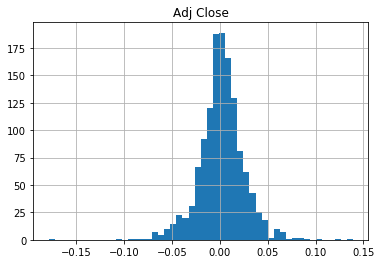

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [23]:
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

In [24]:
cum_daily_return = (1+daily_pct_change).cumprod()
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387792
2011-12-27   5.430537
2011-12-28   5.378574
2011-12-29   5.411702
2011-12-30   5.410099

[1323 rows x 1 columns]


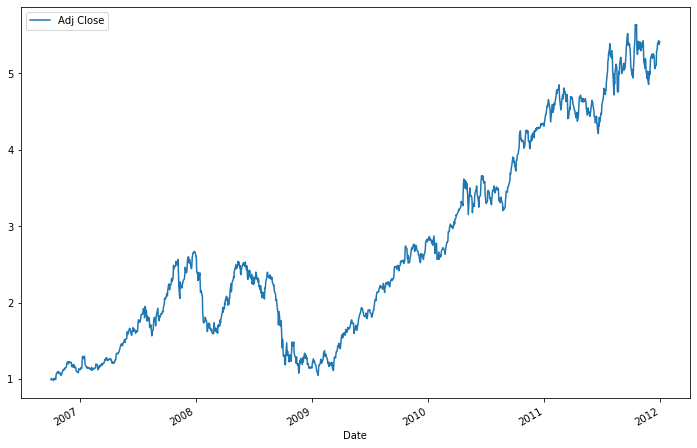

In [25]:
cum_daily_return.plot(figsize=(12, 8))
plt.show()

In [26]:
cum_monthly_return = cum_daily_return.resample('M').mean()
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032896
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140466
2011-12-31   5.248871

[63 rows x 1 columns]


In [27]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOGL']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

In [28]:
all_data.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2006-10-02  2.709643  2.653571  2.682143  2.673571  712639200.0   
       2006-10-03  2.676786  2.613929  2.658929  2.645714  790708800.0   
       2006-10-04  2.695000  2.612857  2.646429  2.692143  829082800.0   
       2006-10-05  2.720000  2.647500  2.661786  2.672500  683883200.0   
       2006-10-06  2.680000  2.636071  2.657857  2.650714  466958800.0   

                   Adj Close  
Ticker Date                   
AAPL   2006-10-02   2.287629  
       2006-10-03   2.263793  
       2006-10-04   2.303519  
       2006-10-05   2.286713  
       2006-10-06   2.268071

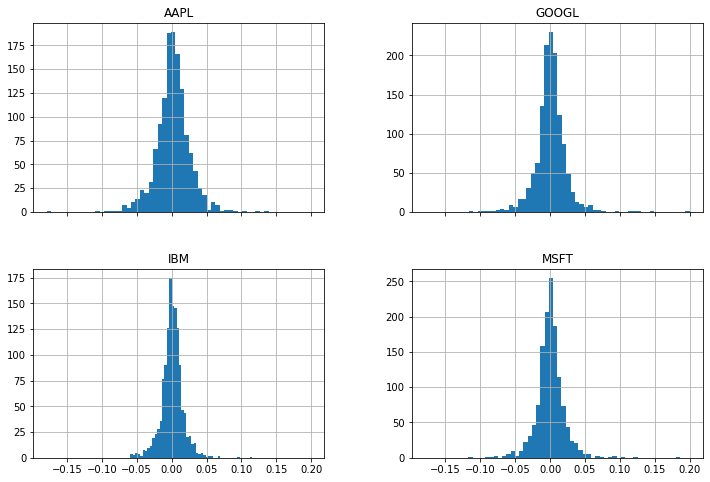

In [29]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8))
plt.show()

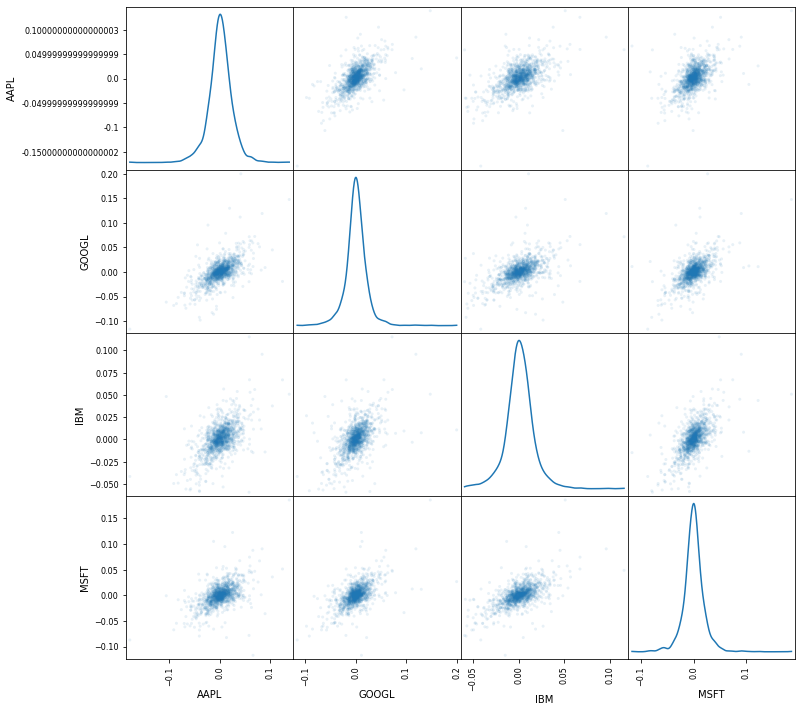

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))
plt.show()

In [31]:
adj_close_px = aapl['Adj Close']
moving_avg = adj_close_px.rolling(window=40).mean()
print(moving_avg[-10:])

Date
2011-12-16    11.878428
2011-12-19    11.870284
2011-12-20    11.862782
2011-12-21    11.861774
2011-12-22    11.860207
2011-12-23    11.859168
2011-12-27    11.860376
2011-12-28    11.858741
2011-12-29    11.865319
2011-12-30    11.871117
Name: Adj Close, dtype: float64


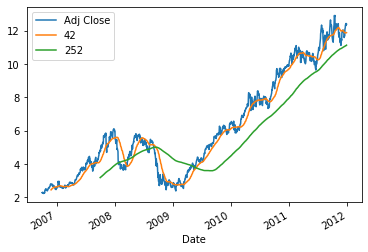

In [32]:
aapl['42'] = adj_close_px.rolling(window=40).mean()
aapl['252'] = adj_close_px.rolling(window=252).mean()
aapl[['Adj Close', '42', '252']].plot()
plt.show()

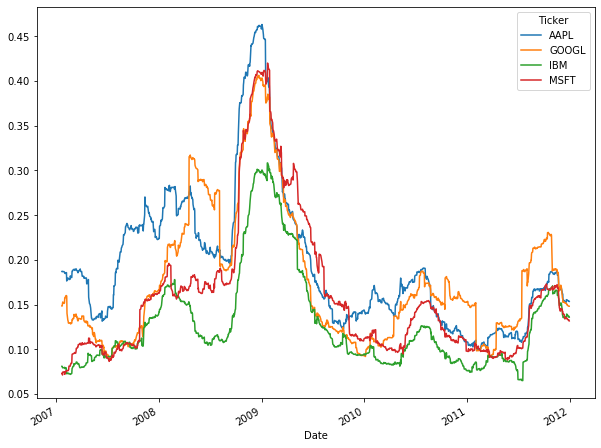

In [33]:
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)
vol.plot(figsize=(10, 8))
plt.show()

In [42]:
import statsmodels.api as sm
# from pandas.core import datetools

all_adj_close = all_data[['Adj Close']]
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

returns_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
returns_data.columns = ['AAPL', 'MSFT']

X = sm.add_constant(returns_data['AAPL'])

model = sm.OLS(returns_data['MSFT'],X).fit()

print(model.summary())          

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.33e-96
Time:                        22:00:17   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

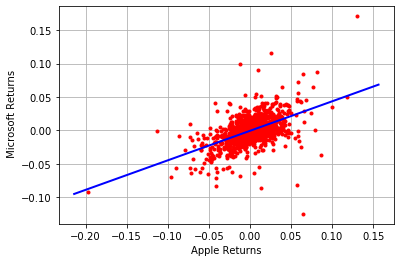

In [43]:
plt.plot(returns_data['AAPL'], returns_data['MSFT'], 'r.')

ax = plt.axis()

x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel(' Microsoft Returns')

plt.show()


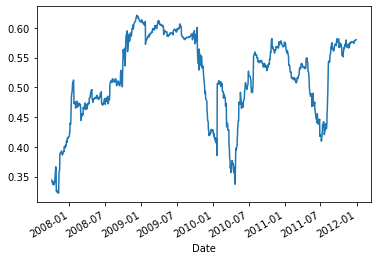

In [45]:
returns_data['MSFT'].rolling(window=252).corr(returns_data['AAPL']).plot()
plt.show()